## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_rate=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu"
                                  )(input_layer)
            x = keras.layers.Dropout(drp_rate)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu"
                                   )(x)
            x = keras.layers.Dropout(drp_rate)(x)
        out = keras.layers.Dense(output_units,
                                activation="softmax")(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.10, 0.15, 0.20, 0.25, 0.30]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_rate in Dropout_EXP:
    model = build_mlp(x_train.shape[1:], drp_rate=drp_rate)
    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True
             )
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-drp-%s" % str(drp_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
194/196 [============================>.] - ETA: 0s - loss: 1.9806 - accuracy: 0.2771WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000027CA3B57168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

196/196 [==============================] - 7s 35ms/step - loss: 1.1758 - accuracy: 0.5753 - val_loss: 1.3444 - val_accuracy: 0.5313
Epoch 45/50
196/196 [==============================] - 7s 35ms/step - loss: 1.1646 - accuracy: 0.5809 - val_loss: 1.3613 - val_accuracy: 0.5232
Epoch 46/50
196/196 [==============================] - 7s 35ms/step - loss: 1.1690 - accuracy: 0.5802 - val_loss: 1.3430 - val_accuracy: 0.5276
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 1.1574 - accuracy: 0.5830 - val_loss: 1.3750 - val_accuracy: 0.5203
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 1.1529 - accuracy: 0.5844 - val_loss: 1.3667 - val_accuracy: 0.5213
Epoch 49/50
196/196 [==============================] - 7s 34ms/step - loss: 1.1562 - accuracy: 0.5844 - val_loss: 1.3508 - val_accuracy: 0.5259
Epoch 50/50
196/196 [==============================] - 8s 41ms/step - loss: 1.1477 - accuracy: 0.5879 - val_loss: 1.3482 - val_accuracy: 0.5260
Epoc

Epoch 38/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3462 - accuracy: 0.5133 - val_loss: 1.3626 - val_accuracy: 0.5169
Epoch 39/50
196/196 [==============================] - 6s 33ms/step - loss: 1.3354 - accuracy: 0.5204 - val_loss: 1.3692 - val_accuracy: 0.5138
Epoch 40/50
196/196 [==============================] - 6s 33ms/step - loss: 1.3351 - accuracy: 0.5219 - val_loss: 1.3756 - val_accuracy: 0.5125
Epoch 41/50
196/196 [==============================] - 7s 34ms/step - loss: 1.3291 - accuracy: 0.5230 - val_loss: 1.3771 - val_accuracy: 0.5096
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 1.3328 - accuracy: 0.5203 - val_loss: 1.3577 - val_accuracy: 0.5203
Epoch 43/50
196/196 [==============================] - 6s 32ms/step - loss: 1.3175 - accuracy: 0.5253 - val_loss: 1.3481 - val_accuracy: 0.5175
Epoch 44/50
196/196 [==============================] - 7s 35ms/step - loss: 1.3228 - accuracy: 0.5238 - val_loss: 1.3665 - val_accuracy:

196/196 [==============================] - 6s 33ms/step - loss: 1.4569 - accuracy: 0.4743 - val_loss: 1.4505 - val_accuracy: 0.4873
Epoch 32/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4505 - accuracy: 0.4773 - val_loss: 1.4216 - val_accuracy: 0.4911
Epoch 33/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4451 - accuracy: 0.4782 - val_loss: 1.4342 - val_accuracy: 0.4899
Epoch 34/50
196/196 [==============================] - 7s 36ms/step - loss: 1.4374 - accuracy: 0.4820 - val_loss: 1.4120 - val_accuracy: 0.4996
Epoch 35/50
196/196 [==============================] - 7s 35ms/step - loss: 1.4383 - accuracy: 0.4784 - val_loss: 1.4277 - val_accuracy: 0.4928
Epoch 36/50
196/196 [==============================] - 7s 37ms/step - loss: 1.4346 - accuracy: 0.4831 - val_loss: 1.4213 - val_accuracy: 0.5007
Epoch 37/50
196/196 [==============================] - 7s 38ms/step - loss: 1.4320 - accuracy: 0.4849 - val_loss: 1.4196 - val_accuracy: 0.4939
Epoc

196/196 [==============================] - 6s 30ms/step - loss: 1.5682 - accuracy: 0.4341 - val_loss: 1.4937 - val_accuracy: 0.4716
Epoch 25/50
196/196 [==============================] - 6s 29ms/step - loss: 1.5651 - accuracy: 0.4376 - val_loss: 1.4736 - val_accuracy: 0.4802
Epoch 26/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5614 - accuracy: 0.4388 - val_loss: 1.5241 - val_accuracy: 0.4622
Epoch 27/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5513 - accuracy: 0.4394 - val_loss: 1.5152 - val_accuracy: 0.4582
Epoch 28/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5461 - accuracy: 0.4411 - val_loss: 1.5012 - val_accuracy: 0.4691
Epoch 29/50
196/196 [==============================] - 6s 29ms/step - loss: 1.5485 - accuracy: 0.4414 - val_loss: 1.4894 - val_accuracy: 0.4718
Epoch 30/50
196/196 [==============================] - 6s 29ms/step - loss: 1.5404 - accuracy: 0.4453 - val_loss: 1.4584 - val_accuracy: 0.4843
Epoc

Epoch 18/50
196/196 [==============================] - 6s 29ms/step - loss: 1.6487 - accuracy: 0.4065 - val_loss: 1.5756 - val_accuracy: 0.4501
Epoch 19/50
196/196 [==============================] - 6s 30ms/step - loss: 1.6358 - accuracy: 0.4094 - val_loss: 1.5709 - val_accuracy: 0.4531
Epoch 20/50
196/196 [==============================] - 7s 35ms/step - loss: 1.6361 - accuracy: 0.4117 - val_loss: 1.5533 - val_accuracy: 0.4555
Epoch 21/50
196/196 [==============================] - 7s 35ms/step - loss: 1.6319 - accuracy: 0.4130 - val_loss: 1.5537 - val_accuracy: 0.4615
Epoch 22/50
196/196 [==============================] - 6s 29ms/step - loss: 1.6209 - accuracy: 0.4159 - val_loss: 1.5738 - val_accuracy: 0.4457
Epoch 23/50
196/196 [==============================] - 6s 30ms/step - loss: 1.6153 - accuracy: 0.4175 - val_loss: 1.5855 - val_accuracy: 0.4443
Epoch 24/50
196/196 [==============================] - 6s 32ms/step - loss: 1.6167 - accuracy: 0.4202 - val_loss: 1.5496 - val_accuracy:

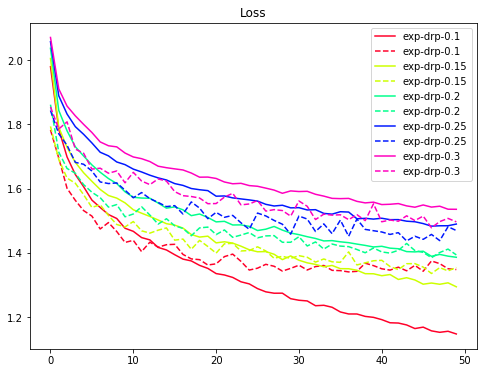

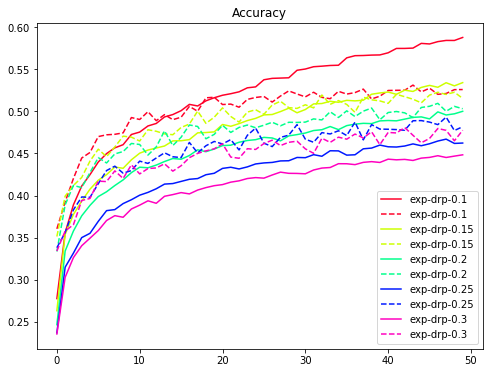

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 5

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()